# Deep Learning and Image Recognition

## GPU vs CPU Performance

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%matplotlib inline

In [22]:
def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(100,7000,10)

    for size in matrix_sizes:
        for device_name in device_times.keys():

            #print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            r1 = tf.random.uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
            r2 = tf.random.uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
            
            start_time = time.time()
            result = tf.matmul(r2, r1)
            time_taken = time.time() - start_time
            #print(result)
            
            device_times[device_name].append(time_taken)

            #print(device_times)

        if time_taken > maximum_time:
            return device_times, matrix_sizes

In [29]:
device_times, matrix_sizes = get_times(0.001)

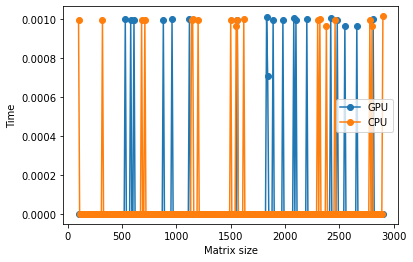

In [30]:
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.legend(["GPU", "CPU"])
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()